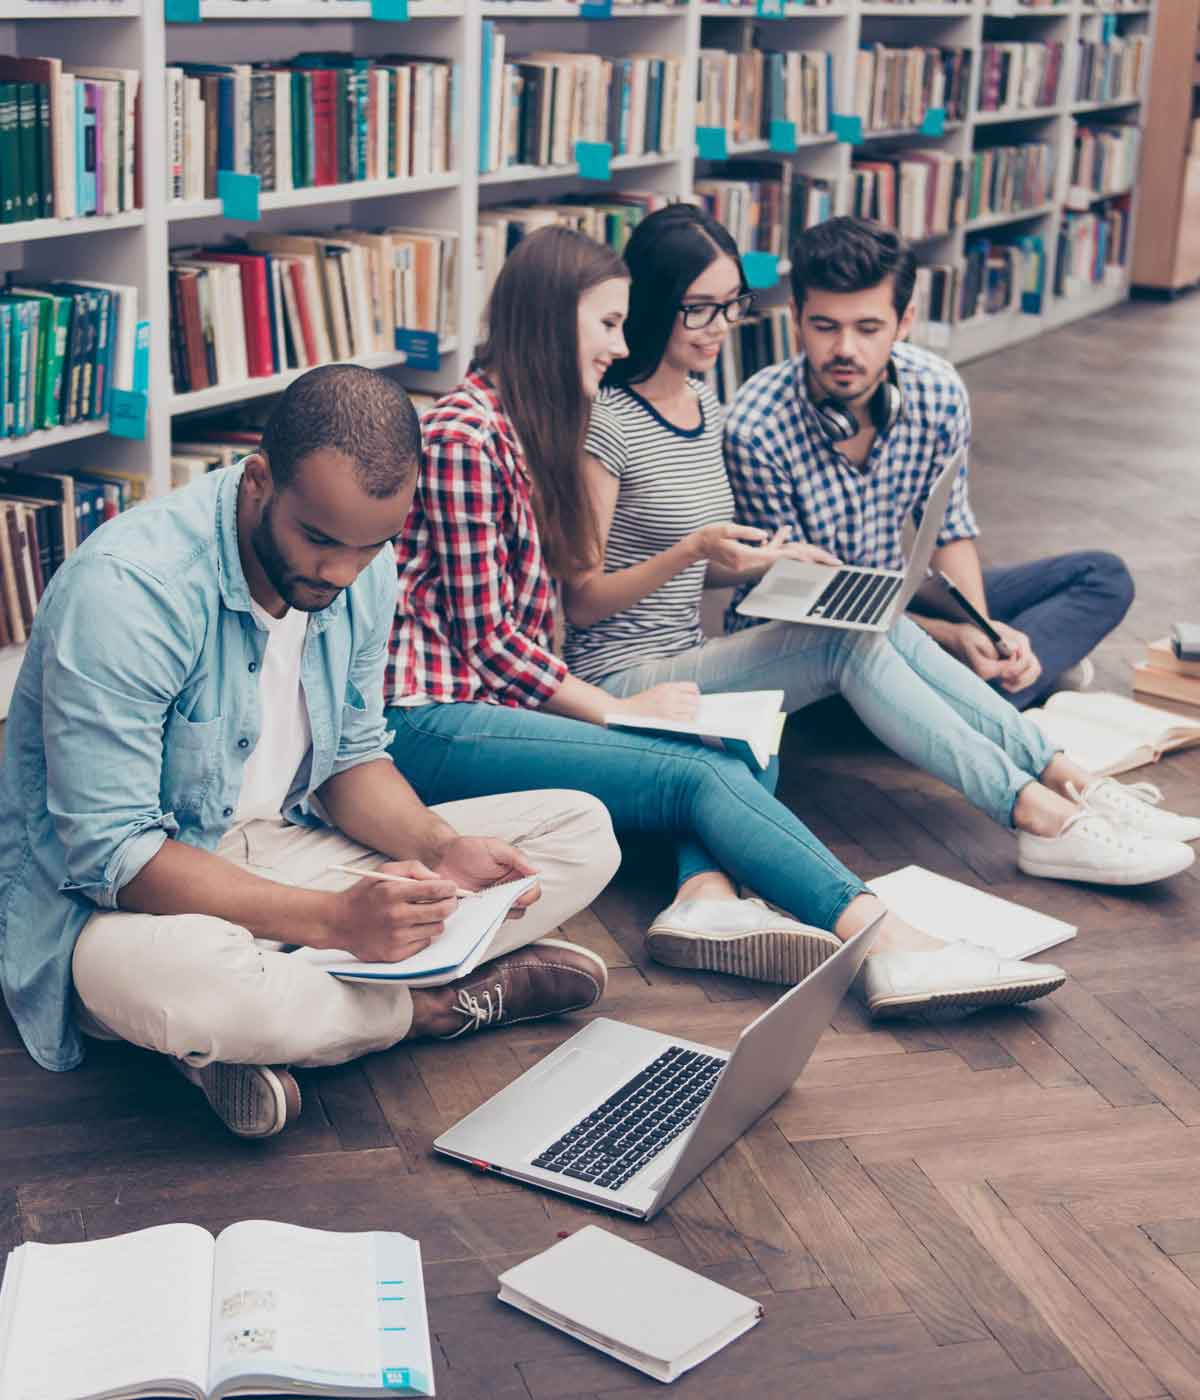

Citadel High School wishes to understand the impact of number of studying hours to students' results.

The school intends to set a standard passmark, plan timetables and routines based on these findings with an aim to efficiently allocate resources to the intended target.

We analysed the dataset below to lay bare all trends, correlations and behaviors that will assist Citadel make data-driven decisions.

In [43]:
#import all necessary libraries for this analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [6]:
df=pd.read_csv("C:\\Users\\raymo\\Downloads\\study_hours\\student_scores.csv")

**DATA WRANGLING**

In [8]:
#Let's load the data 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
#check for nulls
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
#check and drop duplicates
df.drop_duplicates().head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
#get all information pn the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


**DATA ANALYSIS**

In [13]:
#Describe the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The mean study hours and scores across the students are 5 hours and 51% respectively.

The median study hours and scores across the students are 4.8 hours and 47% respectively.

The maximum exam score and number of hours a student spent studying are 95% and 9.2 hours respectively.

The minimum hours a student spent studying and scores result in the dataset are 1 hour and 17% respectively.

Study hours deviate from the mean by 2.5 hours while exam scores deviate by 25% from the mean.

**CORRELATION**

In [17]:
#get correlation between the two fields
df['Hours'].corr(df['Scores']).round(2)

0.98

There is a very strong correlation between studying hours and exam scores.

A correlation of 0.98 is a strong positive correlation that suggests the more the hours the higher the exam scores with the opposite being true.

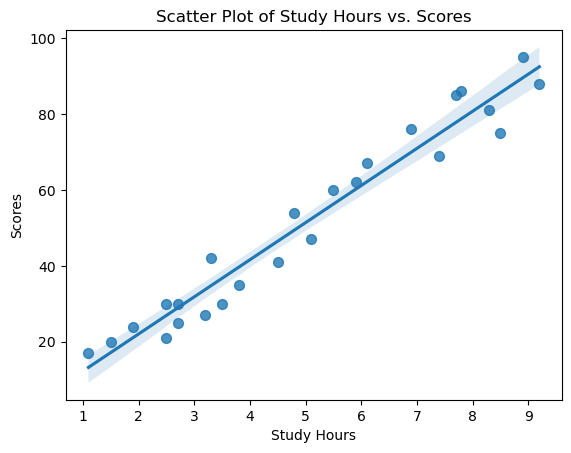

In [19]:
#plot a scatter to visualize this
sns.regplot(x='Hours', y='Scores', data=df, scatter_kws={"s": 50})
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.title('Scatter Plot of Study Hours vs. Scores')
plt.show()

The plot shows how closely associated the number of hours are to exam scores,as hours increase so do the scores

**EXAM SCORES PREDICTION**

How do we predict the exam score of a student based on hours they spent studying?

This insight would be fit to push all students to one side so as to gain control of the exam results at least by a certain good percentage.

In [23]:
#attempt to predict a student's scores from hours spent studying
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Mean Absolute Error: 4.183859899002975
R-squared: 0.9454906892105356


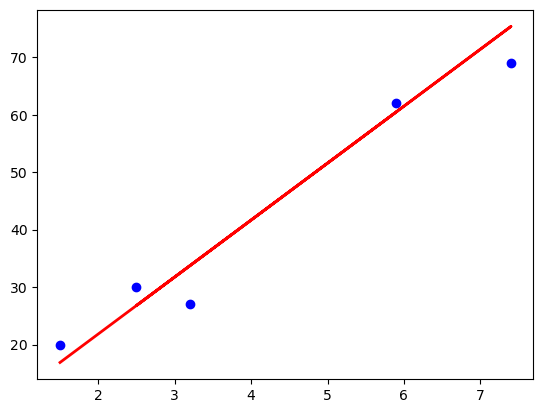

In [42]:
# Split the data into features (hours) and target (scores)
X = df['Hours'].values.reshape(-1, 1)
y = df['Scores']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# test the model
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize the predictions
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

R-squared is a measure that tells of what proportion of the dependent variable (scores) can we predict from the independent variable (hours).

Our model produced an R-squared value of 0.945, meaning our model can correctly predict 94.5% of the exam score based on the study hours.

This is a very fit model for prediction.

Mean Absolute Error is a measure that defines the model's  margin of error, how far are the predicted scores from the actual scores? Our model has an MAE of 4.18 saying our predicted scores can only be 4 points away from  the actual score.

In [41]:
#let's now predict scores from hours of study
#import numpy
import numpy as np
hours = np.array(df['Hours']).reshape(-1, 1) 
scores = np.array(df['Scores'])

# Create and train a linear regression model
model = LinearRegression()
model.fit(hours, scores)

new_data = np.array([[8.0]])

# Make the prediction
predicted_score = model.predict(new_data).round(2)

print(f"If a student studies for: {new_data[0][0]} hours they will most likely score:  {predicted_score[0]} %")

If a student studies for: 8.0 hours they will most likely score:  80.69 %


The linear regression model above helps us predict exam scores based on the given hours invested in studying.

E.g., 8 hours spent in studying will most likely lead to a score of 81% 

Citadel can now take to account hours spent on studying and predict the scores, this lets them set expectations

[0][0] used on the output line are string formatting measures to rid off brackets from the output

**HYPOTHESIS TESTING**

Let's do a hypothesis test on hours and scores aimed at deriving if there's any significant statistical difference between students who put in a set number of hours and those that do not.

In [44]:
# we will define our expected hours of study at threshold of 8
more_hours = df[df['Hours'] >= 8]  
less_hours = df[df['Hours'] < 8]

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(more_hours['Scores'], less_hours['Scores'])

# our significance level,alpha
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print(f"There is a significant difference in scores (p-value={p_value})")
else:
    print(f"No significant difference in scores (p-value={p_value})")

There is a significant difference in scores (p-value=0.0020803323253535113)


The hypothesis test above states that there will be a significant difference in scores between a group of students who study for 8 hours or more compared to those who study for less.
This seconds the idea that students must put in good hours in study to get good exam scores.

The p-value being very close to 0 and less than the alpha states proves there will be a significant difference between the two groups.